Report by: Piyush Mishra

# Introduction

In this report, we look at some differential systems, namely, the Van der Pol oscillator and the FitzHugh Nagumo system, which can be considered as an extention of the former, in and of itself. We model the systems, observe their equilibria, deduce the stability of these equilibria based on different points of inference. We also see if the behaviour of these equilibria changes if we change parameters.

In [1]:
import numpy as np
import scipy.integrate as spi
from numpy.linalg import eigvals
import matplotlib.pyplot as plt

# Van der Pol Oscillator

The Van der Pol system of non-conservative oscillations follows the second order differential equation:

$$ x''(t) - \mu (1-x(t)^2)x'(t) + x(t) = 0 $$

This can be simplified as:

$$ x'(t) = \mu(x(t) - \frac{x(t)^3}{3}) + y(t) $$
$$ y'(t) = -x(t) $$

In [2]:
pop_1 = [0,1]
pop_2 = [3,3]
pop_3 = [-3,-3]

In [3]:
t = np.linspace(0, 50, num=10000)

In [4]:
def vanderpol(pop, t, mu):
    x = pop[0]
    y = pop[1]
    
    x_ = mu * (x - (x**3/3)) + y
    y_ = -x
    
    return [x_, y_]

In [5]:
result_1 = spi.odeint(vanderpol, pop_1, t, args=(1,))
result_2 = spi.odeint(vanderpol, pop_2, t, args=(1,))
result_3 = spi.odeint(vanderpol, pop_3, t, args=(1,))

## Solution curves

We look at the solution curves for dynamics with initial data: $(0,1)$, $(3, 3)$ and $(-3, -3)$

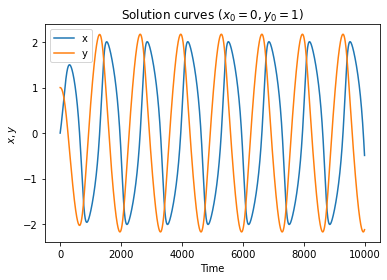

In [6]:
plt.plot(result_1)
plt.title("Solution curves $(x_0=0, y_0=1)$")
plt.xlabel("Time")
plt.ylabel("$x, y$")
plt.legend(["x", "y"])

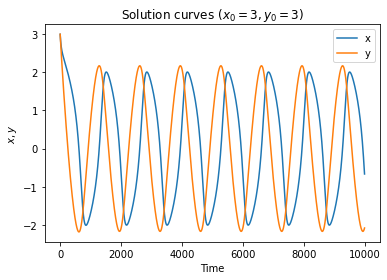

In [7]:
plt.plot(result_2)
plt.title("Solution curves $(x_0=3, y_0=3)$")
plt.xlabel("Time")
plt.ylabel("$x, y$")
plt.legend(["x", "y"])

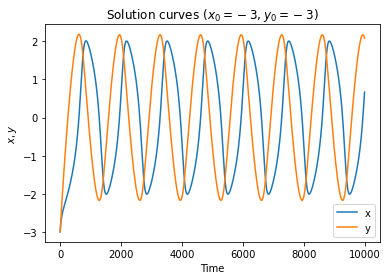

In [8]:
plt.plot(result_3)
plt.title("Solution curves $(x_0=-3, y_0=-3)$")
plt.xlabel("Time")
plt.ylabel("$x, y$")
plt.legend(["x", "y"])

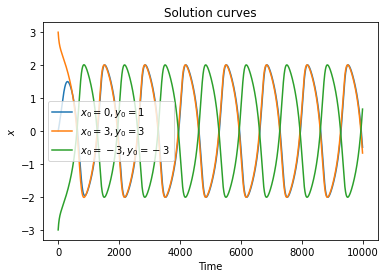

In [9]:
plt.plot(result_1[:, 0])
plt.plot(result_2[:, 0])
plt.plot(result_3[:, 0])
plt.title("Solution curves")
plt.xlabel("Time")
plt.ylabel("$x$")
plt.legend(["$x_0 = 0, y_0 = 1$", "$x_0 = 3, y_0 = 3$", "$x_0 = -3, y_0 = -3$"])

## Solution trajectories

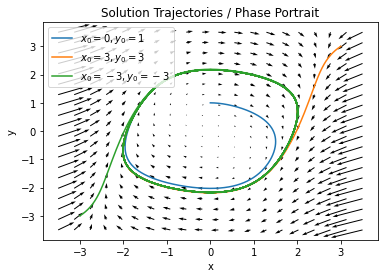

In [10]:
xmin = -3.5; xmax = 3.5
ymin = xmin; ymax = xmax

xx = np.linspace(xmin, xmax, 20)
yy = xx
XX, YY = np.meshgrid(xx, yy)
FX = 0 * XX
FY = 0 * YY
n, p = np.shape(XX)

for i in range(n):
    for j in range(p):
        Z = vanderpol([XX[i, j], YY[i, j]], 0, 1)
        FX[i, j] = Z[0]
        FY[i, j] = Z[1]

plt.quiver(XX, YY, FX, FY)
plt.plot(result_1[:, 0], result_1[:, 1])
plt.plot(result_2[:, 0], result_2[:, 1])
plt.plot(result_3[:, 0], result_3[:, 1])
plt.title("Solution Trajectories / Phase Portrait")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["$x_0 = 0, y_0 = 1$", "$x_0 = 3, y_0 = 3$", "$x_0 = -3, y_0 = -3$"], loc="upper left")

No matter where you start, $(0, 1)$, $(3, 3)$ or $(-3, -3)$, the system has sustained oscillations (limit cycles).

## Equilibrium Points and Stability Analysis

$$ f_1(x, y) = \mu(x - \frac{x^3}{3}) + y = 0$$
$$ f_2(x, y) = -x = 0$$

This implies: $-x = 0$ or $x = 0$ (from $f_2(x, y)$)

Plugging this value in $f_1(x, y)$, we get $y=0$

Thus, equilibrium point is $(0, 0)$

The corresponding Jacobian matrix is:

$$J = \begin{bmatrix}
\mu(1-x^2) & 1\\
-1 & 0
\end{bmatrix}$$

For the stability, we find the eigenvalues of the corresponding Jacobian matrix:

In [11]:
def set_J(mu, x, y):
    J = np.array([[mu * (1 - x**2), 1],
                 [-1, 0]])
    return J

J = set_J(mu = 1, x = 0, y = 0)

In [12]:
eig_vals = eigvals(J)
eig_vals

array([0.5+0.8660254j, 0.5-0.8660254j])

The jacobian at $(0,0)$ admits both the eigenvalues with positive real parts, so $(0, 0)$ is locally unstable. This is seen from the solution trajectories and phase portrait as well.

## Nullcline Analysis

Text(0, 0.5, 'y')

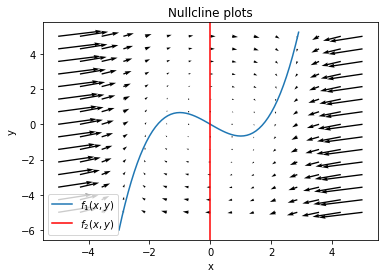

In [13]:
mu = 1
x = np.arange(-3, 3, 0.1)
y1 = -mu * (x - x**3/3)

xmin = -5; xmax = 5

xx = np.linspace(xmin, xmax, 15)
yy = xx
XX, YY = np.meshgrid(xx, yy)
FX = 0 * XX
FY = 0 * YY
n, p = np.shape(XX)


for i in range(n):
    for j in range(p):
        Z = vanderpol([XX[i, j], YY[i, j]], 0, mu)
        FX[i, j] = Z[0]
        FY[i, j] = Z[1]
plt.quiver(XX, YY, FX, FY)
plt.plot(x, y1)
plt.axvline(x=0, color = "red")
plt.legend(["$f_1(x,y)$", "$f_2(x, y)$"])
plt.title("Nullcline plots")
plt.xlabel("x")
plt.ylabel("y")

## Taking $\mu = 20$

In [14]:
result_1_mu_20 = spi.odeint(vanderpol, pop_1, t, args=(20,))
result_2_mu_20 = spi.odeint(vanderpol, pop_2, t, args=(20,))
result_3_mu_20 = spi.odeint(vanderpol, pop_3, t, args=(20,))

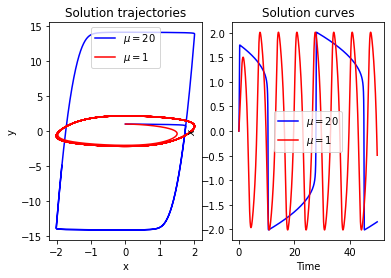

In [15]:
plt.subplot(121)
plt.plot(result_1_mu_20[:, 0], result_1_mu_20[:, 1], color='blue')
plt.plot(result_1[:, 0], result_1[:, 1], color='red')
plt.legend(["$\mu=20$", "$\mu=1$"])
plt.title("Solution trajectories")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(122)
plt.plot(t, result_1_mu_20[:, 0], color='blue')
plt.plot(t, result_1[:, 0], color='red')
plt.title("Solution curves")
plt.xlabel("Time")
plt.ylabel("$x$")
plt.legend(["$\mu=20$", "$\mu=1$"])

So, when $\mu$ is very large, we get phases of rapid increase or decrease separated by phases of relaxation. This is corroborated from the solution trajectories as well.

# FitzHugh Nagumo System

Considering the following extension of the previous Van der Pol system:

$$ x'(t) = \mu(x(t) - \frac{x(t)^3}{3}) + y(t) + I $$
$$ y'(t) = -x(t) + a - by(t)$$

Setting $I = -\frac{a}{b}$:

In [16]:
def fitzhugh(pop, t, mu, a, b):
    x = pop[0]
    y = pop[1]
    
    x_ = mu * (x - (x**3/3)) + y - a/b
    y_ = -x + a - b*y
    
    return [x_, y_]

$$f_1(x,y) = \mu(x - \frac{x^3}{3}) + y - \frac{a}{b} = 0$$
$$f_2(x,y) = -x + a - by = 0$$


we get:
$$y=-\mu(x - \frac{x^3}{3}) + \frac{a}{b}$$
$$y = \frac{a-x}{b}$$
as the nullclines

In [17]:
t = np.linspace(0, 100, num=10000)
mu = 6
a = 1
b = 2

x = np.arange(-3, 3, 0.1)
y1 = -mu * (x - x**3/3) + a/b
y2 = (a - x) / b

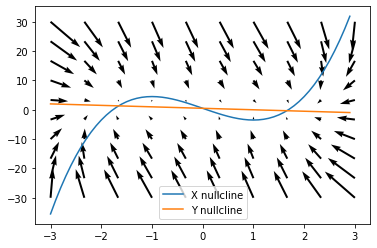

In [18]:
xmin = -3; xmax = 3
ymin = -30; ymax = 30

xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
XX, YY = np.meshgrid(xx, yy)
FX = 0 * XX
FY = 0 * YY
n, p = np.shape(XX)


for i in range(n):
    for j in range(p):
        Z = fitzhugh([XX[i, j], YY[i, j]], 0, mu, a, b)
        FX[i, j] = Z[0]
        FY[i, j] = Z[1]
plt.quiver(XX, YY, FX, FY)
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(['X nullcline', 'Y nullcline'])

Equilibrium points are the points of intersection of the nullclines

the points are:
$$x_0 = 0$$
$$x_1 = -\frac{\sqrt{3}\sqrt{\mu b - 1}}{\sqrt{\mu b}}$$
$$x_2 = \frac{\sqrt{3}\sqrt{\mu b - 1}}{\sqrt{\mu b}}$$

and for each $x$, $$y = \frac{a-x}{b}$$

## Stability of Equilibria

Again, calculating the Jacobian matrix, and finding the corresponding eigenvalues for each point of equilibrium:

$$J = \begin{bmatrix}
\mu(1-x^2) & 1\\
-1 & -b
\end{bmatrix}$$

In [19]:
def set_J(x, y, mu, a, b):
    J = np.array([[mu*(1-x**2), 1],
                 [-1, -b]])
    return J

x1 = -np.sqrt(3*(mu*b - 1))/np.sqrt(mu*b)
x2 = -x1
J1 = set_J(0, a/b, mu, a, b) # x_0
J2 = set_J(x1, (a-x1)/b, mu, a, b) # x_1
J3 = set_J(x2, (a-x2)/b, mu, a, b) # x_2

In [20]:
eigvals(J1)

array([ 5.87298335, -1.87298335])

In [21]:
eigvals(J2)

array([-10.38067791,  -2.11932209])

In [22]:
eigvals(J3)

array([-10.38067791,  -2.11932209])

So, we can say that

* $(0, \frac{a}{b})$ is an unstable equilibrium because its corresponding jacobian admits one eigenvalue with a positive real part. This also assumes that b cannot be 0.
* the other two points, $(x, \frac{a-x}{b})$ where $x \neq 0$ are stable since their corresponding jacobians are the same, thereby aadmiting the same eigenvalues, which are both negative.

### Representing this in the phase plane with the vector field

In [23]:
mu = 6
a = 1
b = 2

result_1 = spi.odeint(fitzhugh, pop_1, t, args=(mu,a,b))
result_2 = spi.odeint(fitzhugh, pop_2, t, args=(mu,a,b))
result_3 = spi.odeint(fitzhugh, pop_3, t, args=(mu,a,b))

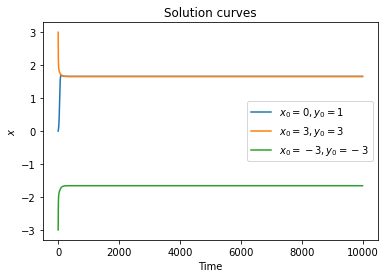

In [24]:
plt.plot(result_1[:, 0])
plt.plot(result_2[:, 0])
plt.plot(result_3[:, 0])
plt.title("Solution curves")
plt.xlabel("Time")
plt.ylabel("$x$")
plt.legend(["$x_0 = 0, y_0 = 1$", "$x_0 = 3, y_0 = 3$", "$x_0 = -3, y_0 = -3$"])

We can see that there aren't any sustained oscillations anymore and that there is a development of 2 stable equilibria.

Text(0.5, 1.0, 'Solution Trajectories / Phase Portrait')

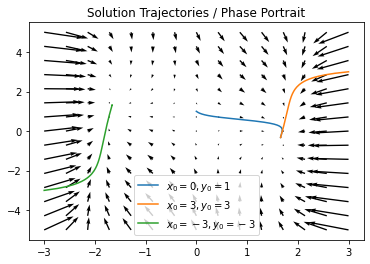

In [25]:
xmin = -3; xmax = 3
ymin = -5; ymax = 5

xx = np.linspace(xmin, xmax, 15)
yy = np.linspace(ymin, ymax, 15)
XX, YY = np.meshgrid(xx, yy)
FX = 0 * XX
FY = 0 * YY
n, p = np.shape(XX)


for i in range(n):
    for j in range(p):
        Z = fitzhugh([XX[i, j], YY[i, j]], 0, mu, a, b)
        FX[i, j] = Z[0]
        FY[i, j] = Z[1]
plt.quiver(XX, YY, FX, FY)
plt.plot(result_1[:, 0], result_1[:, 1])
plt.plot(result_2[:, 0], result_2[:, 1])
plt.plot(result_3[:, 0], result_3[:, 1])
plt.legend(["$x_0 = 0, y_0 = 1$", "$x_0 = 3, y_0 = 3$", "$x_0 = -3, y_0 = -3$"])
plt.title("Solution Trajectories / Phase Portrait")

We see the absence of a limit cycle in the trajectories as well, and that states converge at one of the two points of equilibrium.

## Behaviour of solutions for different values of $a$

In [26]:
def fitzhugh(pop, t, mu, a, b, I):
    x = pop[0]
    y = pop[1]
    
    x_ = mu * (x - (x**3/3)) + y + I
    y_ = -x + a - b*y
    
    return [x_, y_]

In [27]:
mu = 6
b = 0
I = 0

result_1 = spi.odeint(fitzhugh, pop_1, t, args=(mu,0,b,I))
result_2 = spi.odeint(fitzhugh, pop_2, t, args=(mu,0.5,b,I))
result_3 = spi.odeint(fitzhugh, pop_3, t, args=(mu,1,b,I))
result_4 = spi.odeint(fitzhugh, pop_1, t, args=(mu,1.5,b,I))
result_5 = spi.odeint(fitzhugh, pop_2, t, args=(mu,-0.5,b,I))
result_6 = spi.odeint(fitzhugh, pop_3, t, args=(mu,-1,b,I))

### $a=0$

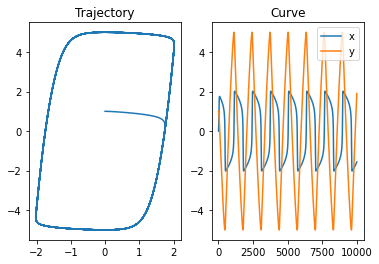

In [28]:
plt.subplot(121)
plt.plot(result_1[:,0], result_1[:,1])
plt.title("Trajectory")
plt.subplot(122)
plt.plot(result_1)
plt.title("Curve")
plt.legend(['x','y'])

### $a=0.5$

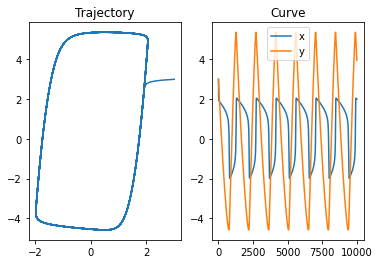

In [29]:
plt.subplot(121)
plt.plot(result_2[:,0], result_2[:,1])
plt.title("Trajectory")
plt.subplot(122)
plt.plot(result_2)
plt.title("Curve")
plt.legend(['x','y'])

### $a=1$

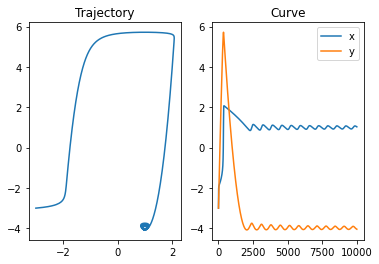

In [30]:
plt.subplot(121)
plt.plot(result_3[:,0], result_3[:,1])
plt.title("Trajectory")
plt.subplot(122)
plt.plot(result_3)
plt.title("Curve")
plt.legend(['x','y'])

### $a = 1.5$

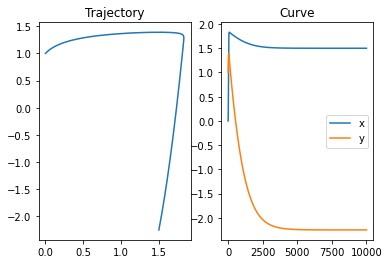

In [31]:
plt.subplot(121)
plt.plot(result_4[:,0], result_4[:,1])
plt.title("Trajectory")
plt.subplot(122)
plt.plot(result_4)
plt.title("Curve")
plt.legend(['x','y'])

### $a = -0.5$

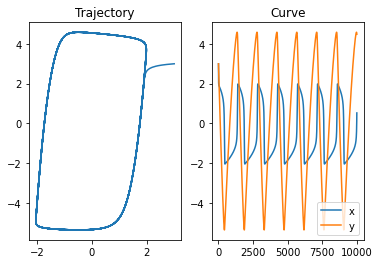

In [32]:
plt.subplot(121)
plt.plot(result_5[:,0], result_5[:,1])
plt.title("Trajectory")
plt.subplot(122)
plt.plot(result_5)
plt.title("Curve")
plt.legend(['x','y'])

### $a = -1$

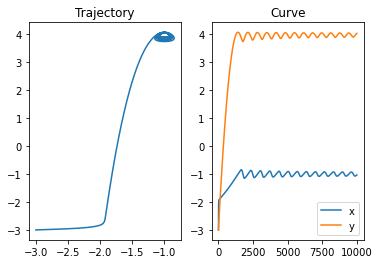

In [33]:
plt.subplot(121)
plt.plot(result_6[:,0], result_6[:,1])
plt.title("Trajectory")
plt.subplot(122)
plt.plot(result_6)
plt.title("Curve")
plt.legend(['x','y'])

For the cases $a = 1$ and $a = -1$, we find that the dynamics spirals around fixed points until infinity. These are not sustained oscillations (so, not a limit cycle) because the amplitude of the oscillations diminishes with time.

* When $a \in (-1, 1)$, we can thus conclude that we get a limit cycle, i.e. unstable equilibrium.
* For all other cases, we get stable equilibria.